In [2]:
import numpy as np
import pandas as pd
import matplotlib as mql
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from numpy.random import standard_normal as stn
from datetime import datetime
from sklearn import linear_model
import statsmodels.api as sm
import scipy.stats as scs
from scipy.stats import norm
import math
from cvxopt import matrix, solvers
import scipy.optimize as sco
from scipy.fftpack import fft,ifft
from sympy import *
from sklearn.decomposition import PCA
import json
from cvxopt import matrix, solvers

In [2]:
import pandas as pd
print(pd.__version__)

1.0.3


## Bl model

先随便用几个ETF数据来做,下面是数据处理得到年化log return

In [3]:
# icode=['AAPL','BA','TSLA','BABA','GS','GOOG','AMZN','TM','F','JPM']
# data=pdr.get_data_yahoo(icode,start='2017-01-01',end='2019-01-01')   # For data
# data_close=data['Adj Close']

# icode2=['^IRX']
# risk_free=pdr.get_data_yahoo(icode2,start='2017-01-01',end='2019-01-01')
# risk_free=risk_free['Adj Close']

energy=pd.read_csv('ENERGY.csv',index_col=0)
material=pd.read_csv('MATERIALS.csv',index_col=0)
industrial=pd.read_csv('INDUSTRIALS.csv',index_col=0)
consumer_discretionary=pd.read_csv("CONSUMER DISCR.csv",index_col=0)
consumer_staples=pd.read_csv('CONSUMER STAPLES.csv',index_col=0)
health_care=pd.read_csv('HEALTH CARE.csv',index_col=0)
financial=pd.read_csv('FINANCIALS.csv',index_col=0)
it=pd.read_csv('INFORMATION TECH.csv',index_col=0)
real_estate=pd.read_csv('REAL ESTATE.csv',index_col=0)
ut=pd.read_csv('UTILITIES.csv',index_col=0)
svc=pd.read_csv('COMM SVC 25-50.csv',index_col=0)



cc=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]




In [4]:
data=pd.merge(energy,material,on='Date',how='left')
data=pd.merge(data,industrial,on='Date',how='left')
data=pd.merge(data,consumer_discretionary,on='Date',how='left')
data=pd.merge(data,consumer_staples,on='Date',how='left')
data=pd.merge(data,health_care,on='Date',how='left')
data=pd.merge(data,financial,on='Date',how='left')
data=pd.merge(data,it,on='Date',how='left')
data=pd.merge(data,svc,on='Date',how='right')
data=pd.merge(data,ut,on='Date',how='left')
data.head()

,USA IMI/ENERGY,USA IMI/MATERIALS,USA IMI/INDUSTRIALS,USA IMI/CONSUMER DISCR,USA IMI/CONSUMER STAPLES,USA IMI/HEALTH CARE,USA IMI/FINANCIALS,USA IMI/INFORMATION TECH,USA IMI/COMM SVC 25-50,USA IMI/UTILITIES
Date,,,,,,,,,,
11/30/1998,262.528572,430.640078,489.061696,627.030511,673.914402,663.038024,460.948412,941.351459,1277.928576,501.549209
12/1/1998,255.294784,426.496795,492.100870,629.963326,678.336046,668.762468,460.407430,978.074370,1289.952771,505.125254
12/2/1998,251.244968,423.514039,486.392520,626.169290,677.989331,677.122553,461.648400,974.320010,1286.622797,505.152571
12/3/1998,249.543814,415.947275,477.427863,615.561059,669.705815,659.225084,453.248151,955.366770,1291.679416,503.335765
12/4/1998,253.186141,417.516124,485.756444,624.100846,677.561272,673.047274,463.513232,988.104411,1316.290439,510.873489


In [5]:
icode=data.columns.values

In [6]:
data=data.iloc[4000:,:]
data

,USA IMI/ENERGY,USA IMI/MATERIALS,USA IMI/INDUSTRIALS,USA IMI/CONSUMER DISCR,USA IMI/CONSUMER STAPLES,USA IMI/HEALTH CARE,USA IMI/FINANCIALS,USA IMI/INFORMATION TECH,USA IMI/COMM SVC 25-50,USA IMI/UTILITIES
Date,,,,,,,,,,
3/31/2014,1439.147440,1474.814890,1544.869866,1807.220740,1902.381996,1951.875552,787.531517,1701.531213,1587.714945,1352.638331
4/1/2014,1447.340138,1486.489119,1557.524141,1833.141917,1901.453531,1967.924915,791.377595,1725.619914,1604.489108,1344.973763
4/2/2014,1453.037162,1496.426704,1567.236146,1845.126918,1904.547505,1974.681542,792.649458,1725.036875,1607.515438,1342.916988
4/3/2014,1459.633988,1497.174462,1567.353300,1834.376346,1905.417428,1964.644411,791.346491,1711.606611,1604.310834,1346.604535
4/4/2014,1453.006857,1479.206324,1547.005795,1801.198911,1895.350064,1928.669947,782.133887,1671.845129,1586.783756,1352.108457
...,...,...,...,...,...,...,...,...,...,...
4/22/2020,594.745358,1620.318572,1982.409516,3219.279224,2998.538464,3707.082578,1024.544822,4541.457520,2324.130000,2355.349841
4/23/2020,613.589009,1633.454087,2000.532542,3227.153593,2973.829548,3730.146867,1022.668316,4515.091879,2344.051013,2317.042590
4/24/2020,615.409847,1657.043448,2016.643835,3279.781764,3008.084920,3788.658488,1036.832744,4606.805892,2370.876897,2332.509681


In [7]:
returns = np.log(data.shift(-1)/data)
returns=returns.dropna(axis=0,how='all')     #kill nan
Cov=returns.cov()*252
annual_returns=returns*252

In [8]:
Cov

,USA IMI/ENERGY,USA IMI/MATERIALS,USA IMI/INDUSTRIALS,USA IMI/CONSUMER DISCR,USA IMI/CONSUMER STAPLES,USA IMI/HEALTH CARE,USA IMI/FINANCIALS,USA IMI/INFORMATION TECH,USA IMI/COMM SVC 25-50,USA IMI/UTILITIES
USA IMI/ENERGY,0.080257,0.045583,0.042542,0.035717,0.021868,0.030826,0.045206,0.039644,0.032914,0.023122
USA IMI/MATERIALS,0.045583,0.041832,0.036623,0.031513,0.021005,0.028252,0.038063,0.035657,0.027634,0.021541
USA IMI/INDUSTRIALS,0.042542,0.036623,0.038260,0.031792,0.021159,0.028300,0.038283,0.035953,0.027830,0.021473
USA IMI/CONSUMER DISCR,0.035717,0.031513,0.031792,0.034364,0.019759,0.027137,0.033659,0.035959,0.027575,0.018510
USA IMI/CONSUMER STAPLES,0.021868,0.021005,0.021159,0.019759,0.022224,0.019600,0.022470,0.022912,0.019524,0.021511
USA IMI/HEALTH CARE,0.030826,0.028252,0.028300,0.027137,0.019600,0.033272,0.030439,0.032272,0.024070,0.019581
USA IMI/FINANCIALS,0.045206,0.038063,0.038283,0.033659,0.022470,0.030439,0.047273,0.037622,0.029842,0.022797
USA IMI/INFORMATION TECH,0.039644,0.035657,0.035953,0.035959,0.022912,0.032272,0.037622,0.046690,0.030825,0.021838
USA IMI/COMM SVC 25-50,0.032914,0.027634,0.027830,0.027575,0.019524,0.024070,0.029842,0.030825,0.034891,0.020013
USA IMI/UTILITIES,0.023122,0.021541,0.021473,0.018510,0.021511,0.019581,0.022797,0.021838,0.020013,0.037173


In [9]:
annual_returns.head()

,USA IMI/ENERGY,USA IMI/MATERIALS,USA IMI/INDUSTRIALS,USA IMI/CONSUMER DISCR,USA IMI/CONSUMER STAPLES,USA IMI/HEALTH CARE,USA IMI/FINANCIALS,USA IMI/INFORMATION TECH,USA IMI/COMM SVC 25-50,USA IMI/UTILITIES
Date,,,,,,,,,,
3/31/2014,1.430504,1.986909,2.055764,3.588789,-0.123020,2.063606,1.227700,3.542565,2.648407,-1.431990
4/1/2014,0.989976,1.679082,1.566477,1.642202,0.409712,0.863729,0.404677,-0.085158,0.474866,-0.385661
4/2/2014,1.141497,0.125892,0.018837,-1.472564,0.115077,-1.284160,-0.414582,-1.969622,-0.502867,0.691024
4/3/2014,-1.146753,-3.042639,-3.292905,-4.599517,-1.334984,-4.657124,-2.950914,-5.923155,-2.768246,1.027890
4/4/2014,-3.909447,-4.256421,-3.926103,-5.429810,0.550245,-2.690789,-3.384506,-2.286010,-2.083240,-0.791040


In [10]:
risk_free=0

In [11]:
returns

,USA IMI/ENERGY,USA IMI/MATERIALS,USA IMI/INDUSTRIALS,USA IMI/CONSUMER DISCR,USA IMI/CONSUMER STAPLES,USA IMI/HEALTH CARE,USA IMI/FINANCIALS,USA IMI/INFORMATION TECH,USA IMI/COMM SVC 25-50,USA IMI/UTILITIES
Date,,,,,,,,,,
3/31/2014,0.005677,0.007885,0.008158,0.014241,-0.000488,0.008189,0.004872,0.014058,0.010510,-0.005682
4/1/2014,0.003928,0.006663,0.006216,0.006517,0.001626,0.003427,0.001606,-0.000338,0.001884,-0.001530
4/2/2014,0.004530,0.000500,0.000075,-0.005844,0.000457,-0.005096,-0.001645,-0.007816,-0.001996,0.002742
4/3/2014,-0.004551,-0.012074,-0.013067,-0.018252,-0.005298,-0.018481,-0.011710,-0.023505,-0.010985,0.004079
4/4/2014,-0.015514,-0.016891,-0.015580,-0.021547,0.002184,-0.010678,-0.013431,-0.009071,-0.008267,-0.003139
...,...,...,...,...,...,...,...,...,...,...
4/21/2020,0.033929,0.019723,0.012885,0.021194,0.010983,0.016271,0.008319,0.037332,0.024110,0.028064
4/22/2020,0.031192,0.008074,0.009100,0.002443,-0.008274,0.006202,-0.001833,-0.005822,0.008535,-0.016398
4/23/2020,0.002963,0.014338,0.008021,0.016176,0.011453,0.015564,0.013755,0.020109,0.011379,0.006653


### BL model 建立
#### $\mu$

In [12]:
mu=np.mean(annual_returns)
mu

USA IMI/ENERGY             -0.128300
USA IMI/MATERIALS           0.026218
USA IMI/INDUSTRIALS         0.049750
USA IMI/CONSUMER DISCR      0.097733
USA IMI/CONSUMER STAPLES    0.074298
USA IMI/HEALTH CARE         0.104107
USA IMI/FINANCIALS          0.052017
USA IMI/INFORMATION TECH    0.157964
USA IMI/COMM SVC 25-50      0.062699
USA IMI/UTILITIES           0.089155
dtype: float64

#### $r_f$

In [13]:
rf=0

#### $\Sigma$

In [14]:
Cov.head()

,USA IMI/ENERGY,USA IMI/MATERIALS,USA IMI/INDUSTRIALS,USA IMI/CONSUMER DISCR,USA IMI/CONSUMER STAPLES,USA IMI/HEALTH CARE,USA IMI/FINANCIALS,USA IMI/INFORMATION TECH,USA IMI/COMM SVC 25-50,USA IMI/UTILITIES
USA IMI/ENERGY,0.080257,0.045583,0.042542,0.035717,0.021868,0.030826,0.045206,0.039644,0.032914,0.023122
USA IMI/MATERIALS,0.045583,0.041832,0.036623,0.031513,0.021005,0.028252,0.038063,0.035657,0.027634,0.021541
USA IMI/INDUSTRIALS,0.042542,0.036623,0.038260,0.031792,0.021159,0.028300,0.038283,0.035953,0.027830,0.021473
USA IMI/CONSUMER DISCR,0.035717,0.031513,0.031792,0.034364,0.019759,0.027137,0.033659,0.035959,0.027575,0.018510
USA IMI/CONSUMER STAPLES,0.021868,0.021005,0.021159,0.019759,0.022224,0.019600,0.022470,0.022912,0.019524,0.021511


#### $x_{mkt}$

In [15]:
mktdata=pd.read_csv('Captial.csv',index_col=0)
# mktdata=pd.DataFrame(mktdata,dtype=np.float)

In [16]:
mkt=mktdata.values
mkt=mkt/(np.sum(mkt))

In [17]:
mkt

array([[0.02581884],
       [0.02759065],
       [0.09275018],
       [0.10541214],
       [0.07461352],
       [0.16118301],
       [0.11717999],
       [0.25780988],
       [0.10116106],
       [0.03648073]])

In [18]:
mu

USA IMI/ENERGY             -0.128300
USA IMI/MATERIALS           0.026218
USA IMI/INDUSTRIALS         0.049750
USA IMI/CONSUMER DISCR      0.097733
USA IMI/CONSUMER STAPLES    0.074298
USA IMI/HEALTH CARE         0.104107
USA IMI/FINANCIALS          0.052017
USA IMI/INFORMATION TECH    0.157964
USA IMI/COMM SVC 25-50      0.062699
USA IMI/UTILITIES           0.089155
dtype: float64

#### risk aversion L

In [19]:
mkt_return=np.dot(returns,mkt)

L=mkt_return.std()*np.sqrt(252)
L

0.1774254329785109

#### Directly $x_{hist}$

In [20]:
#(a)
num=len(icode)
e=np.ones((num,1))

def statistics1(weights):
    
    weights=np.array(weights)
    
    Mark1=np.dot(mu.T,weights)
    Mark2=(1-np.dot(e.T,weights))*rf

    
    
    return [Mark1+Mark2]

def max_Mark(weights):
    
    return -1*statistics1(weights)[0]

cons = (
       {'type':'ineq', 'fun':lambda x: -np.dot(np.dot(x.T,Cov),x)+L**2}
       )
bnds = tuple((0,100) for x in range(num))
hist = sco.minimize(max_Mark, num*[1./num,], method = 'SLSQP', constraints = cons)
print(hist)

     fun: -0.25935932902665254
     jac: array([ 0.12830049, -0.02621837, -0.04975006, -0.09773288, -0.07429758,
       -0.1041075 , -0.05201741, -0.15796417, -0.0626993 , -0.08915512])
 message: 'Optimization terminated successfully.'
    nfev: 217
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([-0.63338701, -0.17850832, -0.10946203,  0.23891481, -0.09919124,
        0.14189283, -0.00437313,  0.90443329, -0.12755418,  0.25602695])


In [21]:
# mu=np.array(mu)

In [22]:
# import cvxpy as cvx
# x = cvx.Variable((10,1))
# # sigma_bar = cvx.Variable((10,10))
# rf = rf
# # x = cp.Variable((10,1))
# e = e.reshape(-1,1)
# I = np.identity(11)


# # sigma_bar.dot(x_mkt)
# Cons = [
#     cvx.quad_form(x, Cov)<=L**2
# ]
# objective = cvx.Maximize(mu.T*x+(1-e.T*x)*rf)
# prob = cvx.Problem(objective, Cons)
# prob.solve(solver='CVXOPT')  # Returns the optimal value.
# print("status:", prob.status)
# print("optimal value", prob.value)
# # print("optimal var", x.value, y.value)
# x.value

In [23]:
x_hist=hist.x/np.sum(hist.x)*100
x_hist

array([-162.91154699,  -45.91358303,  -28.15439495,   61.4505514 ,
        -25.5126766 ,   36.4958243 ,   -1.1247995 ,  232.62653395,
        -32.8078219 ,   65.85191331])

In [24]:
#,options={'maxiter': 100000}

#### BL model
$\delta$

In [25]:
delta=1.25

$P$

In [26]:
P=[-0.1,0,0,-0.2,0.4,-0.1,0.3,0,-0.4,0.1]
P=np.array(P)

$\hat{\Sigma}$

In [27]:
Cov1=Cov

In [28]:
Cov

,USA IMI/ENERGY,USA IMI/MATERIALS,USA IMI/INDUSTRIALS,USA IMI/CONSUMER DISCR,USA IMI/CONSUMER STAPLES,USA IMI/HEALTH CARE,USA IMI/FINANCIALS,USA IMI/INFORMATION TECH,USA IMI/COMM SVC 25-50,USA IMI/UTILITIES
USA IMI/ENERGY,0.080257,0.045583,0.042542,0.035717,0.021868,0.030826,0.045206,0.039644,0.032914,0.023122
USA IMI/MATERIALS,0.045583,0.041832,0.036623,0.031513,0.021005,0.028252,0.038063,0.035657,0.027634,0.021541
USA IMI/INDUSTRIALS,0.042542,0.036623,0.038260,0.031792,0.021159,0.028300,0.038283,0.035953,0.027830,0.021473
USA IMI/CONSUMER DISCR,0.035717,0.031513,0.031792,0.034364,0.019759,0.027137,0.033659,0.035959,0.027575,0.018510
USA IMI/CONSUMER STAPLES,0.021868,0.021005,0.021159,0.019759,0.022224,0.019600,0.022470,0.022912,0.019524,0.021511
USA IMI/HEALTH CARE,0.030826,0.028252,0.028300,0.027137,0.019600,0.033272,0.030439,0.032272,0.024070,0.019581
USA IMI/FINANCIALS,0.045206,0.038063,0.038283,0.033659,0.022470,0.030439,0.047273,0.037622,0.029842,0.022797
USA IMI/INFORMATION TECH,0.039644,0.035657,0.035953,0.035959,0.022912,0.032272,0.037622,0.046690,0.030825,0.021838
USA IMI/COMM SVC 25-50,0.032914,0.027634,0.027830,0.027575,0.019524,0.024070,0.029842,0.030825,0.034891,0.020013
USA IMI/UTILITIES,0.023122,0.021541,0.021473,0.018510,0.021511,0.019581,0.022797,0.021838,0.020013,0.037173


In [29]:
mkt

array([[0.02581884],
       [0.02759065],
       [0.09275018],
       [0.10541214],
       [0.07461352],
       [0.16118301],
       [0.11717999],
       [0.25780988],
       [0.10116106],
       [0.03648073]])

$\hat{r}$

In [30]:
r_hat=rf*e+2*delta*np.dot(Cov,mkt)

In [31]:
r_hat

array([[0.09332965],
       [0.08101256],
       [0.08125673],
       [0.07722691],
       [0.05326697],
       [0.07230594],
       [0.08747053],
       [0.09101139],
       [0.07035101],
       [0.05394328]])

$q$

In [32]:
q=np.dot(P.T,r_hat)
q=q[0]
q=np.array([[q]])

In [33]:
q

array([[-0.00720707]])

$\Omega$

In [34]:
mm=1
r0=1/24
r1=0.02*r0
rr=[r1]

In [35]:
Cov

,USA IMI/ENERGY,USA IMI/MATERIALS,USA IMI/INDUSTRIALS,USA IMI/CONSUMER DISCR,USA IMI/CONSUMER STAPLES,USA IMI/HEALTH CARE,USA IMI/FINANCIALS,USA IMI/INFORMATION TECH,USA IMI/COMM SVC 25-50,USA IMI/UTILITIES
USA IMI/ENERGY,0.080257,0.045583,0.042542,0.035717,0.021868,0.030826,0.045206,0.039644,0.032914,0.023122
USA IMI/MATERIALS,0.045583,0.041832,0.036623,0.031513,0.021005,0.028252,0.038063,0.035657,0.027634,0.021541
USA IMI/INDUSTRIALS,0.042542,0.036623,0.038260,0.031792,0.021159,0.028300,0.038283,0.035953,0.027830,0.021473
USA IMI/CONSUMER DISCR,0.035717,0.031513,0.031792,0.034364,0.019759,0.027137,0.033659,0.035959,0.027575,0.018510
USA IMI/CONSUMER STAPLES,0.021868,0.021005,0.021159,0.019759,0.022224,0.019600,0.022470,0.022912,0.019524,0.021511
USA IMI/HEALTH CARE,0.030826,0.028252,0.028300,0.027137,0.019600,0.033272,0.030439,0.032272,0.024070,0.019581
USA IMI/FINANCIALS,0.045206,0.038063,0.038283,0.033659,0.022470,0.030439,0.047273,0.037622,0.029842,0.022797
USA IMI/INFORMATION TECH,0.039644,0.035657,0.035953,0.035959,0.022912,0.032272,0.037622,0.046690,0.030825,0.021838
USA IMI/COMM SVC 25-50,0.032914,0.027634,0.027830,0.027575,0.019524,0.024070,0.029842,0.030825,0.034891,0.020013
USA IMI/UTILITIES,0.023122,0.021541,0.021473,0.018510,0.021511,0.019581,0.022797,0.021838,0.020013,0.037173


In [36]:
A1=Cov*r0
A2=np.zeros((num,mm))
A3=np.zeros((mm,num))
A4=np.diag(rr)

Omega1=np.concatenate((A1,A2),axis=1)
Omega2=np.concatenate((A3,A4),axis=1)
Omega=np.concatenate((Omega1,Omega2),axis=0)
# A1=np.insert(Cov*r0,-1)

In [37]:
Omega

array([[0.00334403, 0.00189928, 0.00177257, 0.00148822, 0.00091116,
        0.0012844 , 0.00188357, 0.00165185, 0.00137144, 0.00096343,
        0.        ],
       [0.00189928, 0.00174301, 0.00152597, 0.00131305, 0.00087521,
        0.00117715, 0.00158596, 0.00148572, 0.00115142, 0.00089754,
        0.        ],
       [0.00177257, 0.00152597, 0.00159417, 0.00132467, 0.00088162,
        0.00117917, 0.00159511, 0.00149805, 0.00115958, 0.0008947 ,
        0.        ],
       [0.00148822, 0.00131305, 0.00132467, 0.00143184, 0.00082329,
        0.00113073, 0.00140247, 0.0014983 , 0.00114897, 0.00077124,
        0.        ],
       [0.00091116, 0.00087521, 0.00088162, 0.00082329, 0.00092599,
        0.00081668, 0.00093624, 0.00095468, 0.00081351, 0.00089628,
        0.        ],
       [0.0012844 , 0.00117715, 0.00117917, 0.00113073, 0.00081668,
        0.00138634, 0.00126829, 0.00134467, 0.00100293, 0.0008159 ,
        0.        ],
       [0.00188357, 0.00158596, 0.00159511, 0.00140247, 0.

$\Sigma^{BL}$

In [38]:
B1=np.eye(num,num)
P=P.reshape(1,num)
B=np.concatenate((B1,P),axis=0)

In [39]:
B

array([[ 1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ],
       [-0.1,  0. ,  0. , -0.2,  0.4, -0.1,  0.3,  0. , -0.4,  0.1]])

In [40]:
np.linalg.inv(Omega)

array([[  853.84755451,  -602.21477583,  -327.19577353,    31.34650989,
          223.78771045,    71.62028823,  -186.89412217,    62.58745801,
         -153.51208195,   -15.47769076,     0.        ],
       [ -602.21477583,  4161.35135905, -2413.80954749,  -255.79775998,
         -146.05281703,  -165.95593348,  -343.84194914,  -162.77927782,
           79.41575688,   -79.45107238,     0.        ],
       [ -327.19577353, -2413.80954749,  6938.19800132, -1097.05697416,
         -316.78624469,  -175.46125   , -1745.60949421,  -596.35840207,
          -50.82922158,  -135.32994742,     0.        ],
       [   31.34650989,  -255.79775998, -1097.05697416,  5338.30960292,
         -317.76169208,  -324.89241632,  -446.38203121, -1948.66135434,
         -861.66554178,   341.77846746,     0.        ],
       [  223.78771045,  -146.05281703,  -316.78624469,  -317.76169208,
         4107.43616396,  -544.64704016,  -102.64157492,  -196.98630989,
         -463.86782029, -1374.89070566,     0.      

In [41]:
Cov1

,USA IMI/ENERGY,USA IMI/MATERIALS,USA IMI/INDUSTRIALS,USA IMI/CONSUMER DISCR,USA IMI/CONSUMER STAPLES,USA IMI/HEALTH CARE,USA IMI/FINANCIALS,USA IMI/INFORMATION TECH,USA IMI/COMM SVC 25-50,USA IMI/UTILITIES
USA IMI/ENERGY,0.080257,0.045583,0.042542,0.035717,0.021868,0.030826,0.045206,0.039644,0.032914,0.023122
USA IMI/MATERIALS,0.045583,0.041832,0.036623,0.031513,0.021005,0.028252,0.038063,0.035657,0.027634,0.021541
USA IMI/INDUSTRIALS,0.042542,0.036623,0.038260,0.031792,0.021159,0.028300,0.038283,0.035953,0.027830,0.021473
USA IMI/CONSUMER DISCR,0.035717,0.031513,0.031792,0.034364,0.019759,0.027137,0.033659,0.035959,0.027575,0.018510
USA IMI/CONSUMER STAPLES,0.021868,0.021005,0.021159,0.019759,0.022224,0.019600,0.022470,0.022912,0.019524,0.021511
USA IMI/HEALTH CARE,0.030826,0.028252,0.028300,0.027137,0.019600,0.033272,0.030439,0.032272,0.024070,0.019581
USA IMI/FINANCIALS,0.045206,0.038063,0.038283,0.033659,0.022470,0.030439,0.047273,0.037622,0.029842,0.022797
USA IMI/INFORMATION TECH,0.039644,0.035657,0.035953,0.035959,0.022912,0.032272,0.037622,0.046690,0.030825,0.021838
USA IMI/COMM SVC 25-50,0.032914,0.027634,0.027830,0.027575,0.019524,0.024070,0.029842,0.030825,0.034891,0.020013
USA IMI/UTILITIES,0.023122,0.021541,0.021473,0.018510,0.021511,0.019581,0.022797,0.021838,0.020013,0.037173


In [42]:
Cov2=np.linalg.inv(np.dot(np.dot(B.T,np.linalg.inv(Omega)),B))
Cov2

array([[0.00326764, 0.0018682 , 0.00174471, 0.00143948, 0.00093221,
        0.00125591, 0.00187476, 0.00160601, 0.00129943, 0.00099921],
       [0.0018682 , 0.00173037, 0.00151464, 0.00129322, 0.00088378,
        0.00116555, 0.00158238, 0.00146707, 0.00112213, 0.00091209],
       [0.00174471, 0.00151464, 0.001584  , 0.0013069 , 0.0008893 ,
        0.00116878, 0.00159189, 0.00148133, 0.00113332, 0.00090775],
       [0.00143948, 0.00129322, 0.0013069 , 0.00140075, 0.00083673,
        0.00111255, 0.00139685, 0.00146905, 0.00110303, 0.00079406],
       [0.00093221, 0.00088378, 0.0008893 , 0.00083673, 0.00092018,
        0.00082453, 0.00093867, 0.00096732, 0.00083336, 0.00088642],
       [0.00125591, 0.00116555, 0.00116878, 0.00111255, 0.00082453,
        0.00137571, 0.00126501, 0.00132757, 0.00097607, 0.00082924],
       [0.00187476, 0.00158238, 0.00159189, 0.00139685, 0.00093867,
        0.00126501, 0.00196871, 0.0015623 , 0.00123511, 0.00095399],
       [0.00160601, 0.00146707, 0.0014813

In [43]:
Cov_BL=Cov1+Cov2
Cov_BL

,USA IMI/ENERGY,USA IMI/MATERIALS,USA IMI/INDUSTRIALS,USA IMI/CONSUMER DISCR,USA IMI/CONSUMER STAPLES,USA IMI/HEALTH CARE,USA IMI/FINANCIALS,USA IMI/INFORMATION TECH,USA IMI/COMM SVC 25-50,USA IMI/UTILITIES
USA IMI/ENERGY,0.083524,0.047451,0.044286,0.037157,0.022800,0.032082,0.047080,0.041250,0.034214,0.024122
USA IMI/MATERIALS,0.047451,0.043563,0.038138,0.032806,0.021889,0.029417,0.039645,0.037124,0.028756,0.022453
USA IMI/INDUSTRIALS,0.044286,0.038138,0.039844,0.033099,0.022048,0.029469,0.039874,0.037435,0.028963,0.022381
USA IMI/CONSUMER DISCR,0.037157,0.032806,0.033099,0.035765,0.020596,0.028250,0.035056,0.037428,0.028678,0.019304
USA IMI/CONSUMER STAPLES,0.022800,0.021889,0.022048,0.020596,0.023144,0.020425,0.023408,0.023880,0.020358,0.022397
USA IMI/HEALTH CARE,0.032082,0.029417,0.029469,0.028250,0.020425,0.034648,0.031704,0.033600,0.025046,0.020411
USA IMI/FINANCIALS,0.047080,0.039645,0.039874,0.035056,0.023408,0.031704,0.049242,0.039184,0.031077,0.023751
USA IMI/INFORMATION TECH,0.041250,0.037124,0.037435,0.037428,0.023880,0.033600,0.039184,0.048608,0.032066,0.022769
USA IMI/COMM SVC 25-50,0.034214,0.028756,0.028963,0.028678,0.020358,0.025046,0.031077,0.032066,0.036277,0.020881
USA IMI/UTILITIES,0.024122,0.022453,0.022381,0.019304,0.022397,0.020411,0.023751,0.022769,0.020881,0.038705


In [44]:
r_hat.shape

(10, 1)

$\mu^{BL}$

In [45]:
C3=np.concatenate((r_hat,q),axis=0)
C3

array([[ 0.09332965],
       [ 0.08101256],
       [ 0.08125673],
       [ 0.07722691],
       [ 0.05326697],
       [ 0.07230594],
       [ 0.08747053],
       [ 0.09101139],
       [ 0.07035101],
       [ 0.05394328],
       [-0.00720707]])

In [46]:
C1=np.dot(Cov2,B.T)
C2=np.dot(np.linalg.inv(Omega),C3)
mu_BL=np.dot(C1,C2)

In [47]:
mu_BL

array([[0.09332965],
       [0.08101256],
       [0.08125673],
       [0.07722691],
       [0.05326697],
       [0.07230594],
       [0.08747053],
       [0.09101139],
       [0.07035101],
       [0.05394328]])

In [48]:
mu=np.array(mu)
mu

array([-0.12830049,  0.02621837,  0.04975006,  0.09773288,  0.07429758,
        0.1041075 ,  0.05201741,  0.15796417,  0.06269929,  0.08915512])

In [49]:
Cov_BL

,USA IMI/ENERGY,USA IMI/MATERIALS,USA IMI/INDUSTRIALS,USA IMI/CONSUMER DISCR,USA IMI/CONSUMER STAPLES,USA IMI/HEALTH CARE,USA IMI/FINANCIALS,USA IMI/INFORMATION TECH,USA IMI/COMM SVC 25-50,USA IMI/UTILITIES
USA IMI/ENERGY,0.083524,0.047451,0.044286,0.037157,0.022800,0.032082,0.047080,0.041250,0.034214,0.024122
USA IMI/MATERIALS,0.047451,0.043563,0.038138,0.032806,0.021889,0.029417,0.039645,0.037124,0.028756,0.022453
USA IMI/INDUSTRIALS,0.044286,0.038138,0.039844,0.033099,0.022048,0.029469,0.039874,0.037435,0.028963,0.022381
USA IMI/CONSUMER DISCR,0.037157,0.032806,0.033099,0.035765,0.020596,0.028250,0.035056,0.037428,0.028678,0.019304
USA IMI/CONSUMER STAPLES,0.022800,0.021889,0.022048,0.020596,0.023144,0.020425,0.023408,0.023880,0.020358,0.022397
USA IMI/HEALTH CARE,0.032082,0.029417,0.029469,0.028250,0.020425,0.034648,0.031704,0.033600,0.025046,0.020411
USA IMI/FINANCIALS,0.047080,0.039645,0.039874,0.035056,0.023408,0.031704,0.049242,0.039184,0.031077,0.023751
USA IMI/INFORMATION TECH,0.041250,0.037124,0.037435,0.037428,0.023880,0.033600,0.039184,0.048608,0.032066,0.022769
USA IMI/COMM SVC 25-50,0.034214,0.028756,0.028963,0.028678,0.020358,0.025046,0.031077,0.032066,0.036277,0.020881
USA IMI/UTILITIES,0.024122,0.022453,0.022381,0.019304,0.022397,0.020411,0.023751,0.022769,0.020881,0.038705


In [50]:
Cov

,USA IMI/ENERGY,USA IMI/MATERIALS,USA IMI/INDUSTRIALS,USA IMI/CONSUMER DISCR,USA IMI/CONSUMER STAPLES,USA IMI/HEALTH CARE,USA IMI/FINANCIALS,USA IMI/INFORMATION TECH,USA IMI/COMM SVC 25-50,USA IMI/UTILITIES
USA IMI/ENERGY,0.080257,0.045583,0.042542,0.035717,0.021868,0.030826,0.045206,0.039644,0.032914,0.023122
USA IMI/MATERIALS,0.045583,0.041832,0.036623,0.031513,0.021005,0.028252,0.038063,0.035657,0.027634,0.021541
USA IMI/INDUSTRIALS,0.042542,0.036623,0.038260,0.031792,0.021159,0.028300,0.038283,0.035953,0.027830,0.021473
USA IMI/CONSUMER DISCR,0.035717,0.031513,0.031792,0.034364,0.019759,0.027137,0.033659,0.035959,0.027575,0.018510
USA IMI/CONSUMER STAPLES,0.021868,0.021005,0.021159,0.019759,0.022224,0.019600,0.022470,0.022912,0.019524,0.021511
USA IMI/HEALTH CARE,0.030826,0.028252,0.028300,0.027137,0.019600,0.033272,0.030439,0.032272,0.024070,0.019581
USA IMI/FINANCIALS,0.045206,0.038063,0.038283,0.033659,0.022470,0.030439,0.047273,0.037622,0.029842,0.022797
USA IMI/INFORMATION TECH,0.039644,0.035657,0.035953,0.035959,0.022912,0.032272,0.037622,0.046690,0.030825,0.021838
USA IMI/COMM SVC 25-50,0.032914,0.027634,0.027830,0.027575,0.019524,0.024070,0.029842,0.030825,0.034891,0.020013
USA IMI/UTILITIES,0.023122,0.021541,0.021473,0.018510,0.021511,0.019581,0.022797,0.021838,0.020013,0.037173


#### BL result

In [51]:
num=len(icode)
e=np.zeros(num)+1

def statistics2(weights):
    
    weights=np.array(weights)
    
    Mark1=np.dot(mu_BL.T,weights)
    Mark2=(1-np.dot(e.T,weights))*rf

    
    
    return [Mark1+Mark2]

def max_Mark1(weights):
    
    return -10/1*statistics2(weights)[0]

cons = (
       {'type':'ineq', 'fun':lambda x: -np.dot(np.dot(x.T,Cov_BL),x)+L**2}
       )
bnds = tuple((0,20) for x in range(num))
bl = sco.minimize(max_Mark1,cc, method = 'SLSQP',  constraints = cons)
print(bl)

     fun: -0.7715000222125576
     jac: array([-0.93329652, -0.81012563, -0.81256728, -0.77226912, -0.53266968,
       -0.72305942, -0.87470533, -0.91011393, -0.7035101 , -0.53943278])
 message: 'Optimization terminated successfully.'
    nfev: 194
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([0.02590442, 0.02766444, 0.08817449, 0.10515551, 0.07271163,
       0.15859531, 0.11497997, 0.25103135, 0.1005725 , 0.03495557])


In [52]:
x_bl=bl.x/np.sum(bl.x)*100
x_bl

array([ 2.64399602,  2.82363594,  8.99973729, 10.73294476,  7.42148344,
       16.18740342, 11.73570113, 25.62210578, 10.26516924,  3.56782299])

In [53]:
x_mkt=mkt/np.sum(mkt)*100
x_mkt=np.array(x_mkt)
x_mkt

array([[ 2.58188418],
       [ 2.75906463],
       [ 9.27501837],
       [10.54121408],
       [ 7.46135222],
       [16.11830092],
       [11.71799928],
       [25.78098764],
       [10.11610578],
       [ 3.6480729 ]])

## MVIO model

In [54]:
delta

1.25

$\bar{\Sigma}$

In [55]:
C_new=2*delta*Cov

In [56]:
mu_BL

array([[0.09332965],
       [0.08101256],
       [0.08125673],
       [0.07722691],
       [0.05326697],
       [0.07230594],
       [0.08747053],
       [0.09101139],
       [0.07035101],
       [0.05394328]])

In [57]:
mkt

array([[0.02581884],
       [0.02759065],
       [0.09275018],
       [0.10541214],
       [0.07461352],
       [0.16118301],
       [0.11717999],
       [0.25780988],
       [0.10116106],
       [0.03648073]])

In [58]:
##### special case with sigma = 0.5 * delta * sigma : BL
import cvxpy as cvx
mu_io = cvx.Variable((10,1))
# sigma_bar = cvx.Variable((10,10))
t = cvx.Variable((1,1))
u = cvx.Variable((11,1))
rf = rf
Omega = Omega 
x_mkt = np.array(mkt).reshape(-1,1)
# x = cp.Variable((10,1))
e = e.reshape(-1,1)
I = np.identity(11)
q = q.reshape(-1,1)


tmp = 1.25*2*np.array(Cov).dot(np.array(x_mkt).reshape(-1,1))
# sigma_bar.dot(x_mkt)
Cons = [
    u - np.linalg.inv(np.sqrt(Omega)) @ cvx.vstack([mu_io - rf*e - tmp, \
                                                          P@mu_io - q]) == 0,
    cvx.vstack([ cvx.hstack([t, u.T]), cvx.hstack([u, I]) ]) >> 0,
#     sigma_bar >= 0
]
objective = cvx.Minimize(t)
prob = cvx.Problem(objective, Cons)
prob.solve(solver='CVXOPT')  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
# print("optimal var", x.value, y.value)

status: optimal
optimal value -3.408247543950701e-10


In [59]:
mu_io.value

array([[0.09332965],
       [0.08101256],
       [0.08125673],
       [0.07722691],
       [0.05326697],
       [0.07230594],
       [0.08747053],
       [0.09101139],
       [0.07035101],
       [0.05394328]])

In [60]:
Cov

,USA IMI/ENERGY,USA IMI/MATERIALS,USA IMI/INDUSTRIALS,USA IMI/CONSUMER DISCR,USA IMI/CONSUMER STAPLES,USA IMI/HEALTH CARE,USA IMI/FINANCIALS,USA IMI/INFORMATION TECH,USA IMI/COMM SVC 25-50,USA IMI/UTILITIES
USA IMI/ENERGY,0.080257,0.045583,0.042542,0.035717,0.021868,0.030826,0.045206,0.039644,0.032914,0.023122
USA IMI/MATERIALS,0.045583,0.041832,0.036623,0.031513,0.021005,0.028252,0.038063,0.035657,0.027634,0.021541
USA IMI/INDUSTRIALS,0.042542,0.036623,0.038260,0.031792,0.021159,0.028300,0.038283,0.035953,0.027830,0.021473
USA IMI/CONSUMER DISCR,0.035717,0.031513,0.031792,0.034364,0.019759,0.027137,0.033659,0.035959,0.027575,0.018510
USA IMI/CONSUMER STAPLES,0.021868,0.021005,0.021159,0.019759,0.022224,0.019600,0.022470,0.022912,0.019524,0.021511
USA IMI/HEALTH CARE,0.030826,0.028252,0.028300,0.027137,0.019600,0.033272,0.030439,0.032272,0.024070,0.019581
USA IMI/FINANCIALS,0.045206,0.038063,0.038283,0.033659,0.022470,0.030439,0.047273,0.037622,0.029842,0.022797
USA IMI/INFORMATION TECH,0.039644,0.035657,0.035953,0.035959,0.022912,0.032272,0.037622,0.046690,0.030825,0.021838
USA IMI/COMM SVC 25-50,0.032914,0.027634,0.027830,0.027575,0.019524,0.024070,0.029842,0.030825,0.034891,0.020013
USA IMI/UTILITIES,0.023122,0.021541,0.021473,0.018510,0.021511,0.019581,0.022797,0.021838,0.020013,0.037173


In [61]:
mu_io.value

array([[0.09332965],
       [0.08101256],
       [0.08125673],
       [0.07722691],
       [0.05326697],
       [0.07230594],
       [0.08747053],
       [0.09101139],
       [0.07035101],
       [0.05394328]])

In [62]:
from cvxpy.reductions.solvers.defines import INSTALLED_SOLVERS
INSTALLED_SOLVERS

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCS']

In [63]:
q

array([[-0.00720707]])

In [64]:
np.savetxt('Omega.csv', Omega, delimiter = ',')
np.savetxt('xmkt.csv', x_mkt, delimiter = ',')
np.savetxt('Cov.csv', Cov, delimiter = ',')

In [65]:
##### general case with sigma as vriable.
import cvxpy as cvx
mu_io = cvx.Variable((10,1))
sigma_bar = cvx.Variable((10,10))
t = cvx.Variable((1,1))
u = cvx.Variable((11,1))
rf = rf
Omega = Omega 
x_mkt = np.array(mkt).reshape(-1,1)
e = e.reshape(-1,1)
I = np.identity(11)
q = q.reshape(-1,1)

# sigma_bar.dot(x_mkt)
Cons = [
    u - np.linalg.inv(np.sqrt(Omega)) @ cvx.vstack([mu_io - rf*e - sigma_bar@x_mkt, \
                                                          P @ mu_io - q]) == 0,
    cvx.vstack([ cvx.hstack([t, u.T]), cvx.hstack([u, I])]) >> 0,
    sigma_bar >= 0
]

objective = cvx.Minimize(t)
prob = cvx.Problem(objective, Cons)
prob.solve(solver='CVXOPT')  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
# print("optimal var", x.value, y.value)

status: optimal
optimal value -3.7006736635915204e-10


In [66]:
q

array([[-0.00720707]])

In [67]:
print(cvx.installed_solvers())

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCS']


In [68]:
mu_io.value

array([[0.55334451],
       [0.55183941],
       [0.55183941],
       [0.55485494],
       [0.54587212],
       [0.5533445 ],
       [0.54735602],
       [0.55183941],
       [0.55789192],
       [0.55033964]])

In [69]:
q

array([[-0.00720707]])

In [70]:
C_new

,USA IMI/ENERGY,USA IMI/MATERIALS,USA IMI/INDUSTRIALS,USA IMI/CONSUMER DISCR,USA IMI/CONSUMER STAPLES,USA IMI/HEALTH CARE,USA IMI/FINANCIALS,USA IMI/INFORMATION TECH,USA IMI/COMM SVC 25-50,USA IMI/UTILITIES
USA IMI/ENERGY,0.200642,0.113957,0.106354,0.089293,0.054669,0.077064,0.113014,0.099111,0.082286,0.057806
USA IMI/MATERIALS,0.113957,0.104580,0.091558,0.078783,0.052513,0.070629,0.095157,0.089143,0.069085,0.053852
USA IMI/INDUSTRIALS,0.106354,0.091558,0.095650,0.079480,0.052897,0.070750,0.095706,0.089883,0.069575,0.053682
USA IMI/CONSUMER DISCR,0.089293,0.078783,0.079480,0.085910,0.049398,0.067844,0.084148,0.089898,0.068938,0.046274
USA IMI/CONSUMER STAPLES,0.054669,0.052513,0.052897,0.049398,0.055559,0.049001,0.056174,0.057281,0.048811,0.053777
USA IMI/HEALTH CARE,0.077064,0.070629,0.070750,0.067844,0.049001,0.083181,0.076097,0.080680,0.060176,0.048954
USA IMI/FINANCIALS,0.113014,0.095157,0.095706,0.084148,0.056174,0.076097,0.118183,0.094055,0.074605,0.056992
USA IMI/INFORMATION TECH,0.099111,0.089143,0.089883,0.089898,0.057281,0.080680,0.094055,0.116725,0.077063,0.054595
USA IMI/COMM SVC 25-50,0.082286,0.069085,0.069575,0.068938,0.048811,0.060176,0.074605,0.077063,0.087228,0.050033
USA IMI/UTILITIES,0.057806,0.053852,0.053682,0.046274,0.053777,0.048954,0.056992,0.054595,0.050033,0.092932


In [71]:
alpha=0.87
ee=10**(-8)
value,vector=np.linalg.eig(C_new)

In [72]:
value

array([0.78065061, 0.08849698, 0.0574439 , 0.02905811, 0.02376642,
       0.01815335, 0.01488115, 0.01233044, 0.00901569, 0.0067943 ])

In [73]:
vector

array([[ 4.23342034e-01,  7.49825946e-01, -3.78523794e-01,
        -2.00166327e-01,  2.30832026e-01,  4.31617556e-02,
         1.20107827e-01,  7.39012829e-02,  1.27119951e-02,
        -7.11143077e-04],
       [ 3.40417833e-01,  9.70739604e-02,  3.44079703e-02,
         3.11682830e-01, -1.56929367e-01, -2.20068037e-01,
        -7.04188312e-01, -1.32054932e-01, -1.35564943e-01,
        -4.14255894e-01],
       [ 3.33494265e-01,  1.54507724e-02,  9.44655338e-02,
         2.48381702e-01, -1.80412619e-01, -1.12932233e-01,
        -1.66058971e-01, -1.97138283e-02,  9.74311869e-02,
         8.57418327e-01],
       [ 3.04645481e-01, -9.49513265e-02,  2.77782404e-01,
        -1.07124779e-01,  2.69278878e-02, -2.51455784e-01,
         1.26550526e-01,  6.40246115e-02,  8.25046625e-01,
        -2.11578241e-01],
       [ 2.11237462e-01, -3.07113295e-01, -1.94469001e-01,
        -2.77729872e-02,  4.09453554e-02,  5.35627143e-02,
        -1.22789316e-01,  8.90850031e-01, -9.29928900e-02,
        -2.

In [74]:
vector[:,0]

array([0.42334203, 0.34041783, 0.33349426, 0.30464548, 0.21123746,
       0.2788511 , 0.35824957, 0.34904175, 0.28038877, 0.22293488])

In [75]:
vector[0]

array([ 4.23342034e-01,  7.49825946e-01, -3.78523794e-01, -2.00166327e-01,
        2.30832026e-01,  4.31617556e-02,  1.20107827e-01,  7.39012829e-02,
        1.27119951e-02, -7.11143077e-04])

In [76]:
print(cvx.installed_solvers())

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCS']


In [77]:
value[0:3]

array([0.78065061, 0.08849698, 0.0574439 ])

In [78]:
##### general case with sigma as vriable.
alpha=0.87
ee=10**(-8)
value,vector=np.linalg.eig(C_new)


import cvxpy as cvx
mu_io = cvx.Variable((10,1))
sigma_bar = cvx.Variable((10,10))
t = cvx.Variable((1,1))
u = cvx.Variable((11,1))
rf = rf
Omega = Omega 
x_mkt = np.array(mkt).reshape(-1,1)
e = e.reshape(-1,1)
I = np.identity(11)
q = q.reshape(-1,1)

# sigma_bar.dot(x_mkt)
Cons = [
    u - np.linalg.inv(np.sqrt(Omega)) @ cvx.vstack([mu_io - rf*e - sigma_bar@x_mkt, \
                                                          P @ mu_io - q]) == 0,
    cvx.vstack([ cvx.hstack([t, u.T]), cvx.hstack([u, I])]) >> 0,
    value[0:3].sum()>=alpha*cvx.trace(sigma_bar),
    cvx.norm(-sigma_bar@vector[:,0]+value[0]*vector[:,0],p=2)<=ee,
    cvx.norm(-sigma_bar@vector[:,1]+value[1]*vector[:,1],p=2)<=ee,
    cvx.norm(-sigma_bar@vector[:,2]+value[2]*vector[:,2],p=2)<=ee,
    sigma_bar >= 0
]

objective = cvx.Minimize(t)
prob = cvx.Problem(objective, Cons)
prob.solve(solver='CVXOPT')  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
# print("optimal var", x.value, y.value)

status: optimal
optimal value -2.653624949775139e-09


In [79]:
mu_io.value

array([[0.09215873],
       [0.0815262 ],
       [0.08094644],
       [0.07666264],
       [0.05229072],
       [0.07053503],
       [0.0869047 ],
       [0.08840728],
       [0.06973953],
       [0.05302933]])

In [80]:
mu_BL

array([[0.09332965],
       [0.08101256],
       [0.08125673],
       [0.07722691],
       [0.05326697],
       [0.07230594],
       [0.08747053],
       [0.09101139],
       [0.07035101],
       [0.05394328]])

In [81]:
mu

array([-0.12830049,  0.02621837,  0.04975006,  0.09773288,  0.07429758,
        0.1041075 ,  0.05201741,  0.15796417,  0.06269929,  0.08915512])

In [82]:
sigma_bar.value

array([[0.2034564 , 0.11456716, 0.1044653 , 0.09921082, 0.07057769,
        0.08381731, 0.10185931, 0.08677272, 0.0859328 , 0.04993839],
       [0.12220862, 0.0887305 , 0.0863376 , 0.09087011, 0.06764997,
        0.08020347, 0.08352381, 0.08106837, 0.07891862, 0.04632782],
       [0.1124838 , 0.08764388, 0.08584002, 0.09048161, 0.06762621,
        0.08025258, 0.08221149, 0.08098485, 0.078575  , 0.04611787],
       [0.09111532, 0.08008433, 0.07925685, 0.08486253, 0.06118622,
        0.07750949, 0.07682303, 0.08089977, 0.0737151 , 0.03918356],
       [0.05549081, 0.05370543, 0.05262582, 0.05476512, 0.05916546,
        0.05442328, 0.04980699, 0.04758912, 0.05517994, 0.05066369],
       [0.076983  , 0.07246689, 0.0719397 , 0.07917752, 0.06260303,
        0.07226192, 0.06924802, 0.07159794, 0.06999566, 0.04267795],
       [0.11975576, 0.09480491, 0.09144409, 0.09747817, 0.07195384,
        0.08552453, 0.09144742, 0.08635186, 0.08418518, 0.04911978],
       [0.09908161, 0.09173958, 0.0909228

In [83]:
Cov

,USA IMI/ENERGY,USA IMI/MATERIALS,USA IMI/INDUSTRIALS,USA IMI/CONSUMER DISCR,USA IMI/CONSUMER STAPLES,USA IMI/HEALTH CARE,USA IMI/FINANCIALS,USA IMI/INFORMATION TECH,USA IMI/COMM SVC 25-50,USA IMI/UTILITIES
USA IMI/ENERGY,0.080257,0.045583,0.042542,0.035717,0.021868,0.030826,0.045206,0.039644,0.032914,0.023122
USA IMI/MATERIALS,0.045583,0.041832,0.036623,0.031513,0.021005,0.028252,0.038063,0.035657,0.027634,0.021541
USA IMI/INDUSTRIALS,0.042542,0.036623,0.038260,0.031792,0.021159,0.028300,0.038283,0.035953,0.027830,0.021473
USA IMI/CONSUMER DISCR,0.035717,0.031513,0.031792,0.034364,0.019759,0.027137,0.033659,0.035959,0.027575,0.018510
USA IMI/CONSUMER STAPLES,0.021868,0.021005,0.021159,0.019759,0.022224,0.019600,0.022470,0.022912,0.019524,0.021511
USA IMI/HEALTH CARE,0.030826,0.028252,0.028300,0.027137,0.019600,0.033272,0.030439,0.032272,0.024070,0.019581
USA IMI/FINANCIALS,0.045206,0.038063,0.038283,0.033659,0.022470,0.030439,0.047273,0.037622,0.029842,0.022797
USA IMI/INFORMATION TECH,0.039644,0.035657,0.035953,0.035959,0.022912,0.032272,0.037622,0.046690,0.030825,0.021838
USA IMI/COMM SVC 25-50,0.032914,0.027634,0.027830,0.027575,0.019524,0.024070,0.029842,0.030825,0.034891,0.020013
USA IMI/UTILITIES,0.023122,0.021541,0.021473,0.018510,0.021511,0.019581,0.022797,0.021838,0.020013,0.037173


In [84]:
num=len(icode)
e=np.zeros(num)+1

def statistics2(weights):
    
    weights=np.array(weights)
    
    Mark1=np.dot(mu_io.value.T,weights)
    Mark2=(1-np.dot(e.T,weights))*rf

    
    
    return [Mark1+Mark2]

def max_Mark1(weights):
    
    return -1/100*statistics2(weights)[0]

cons = (
       {'type':'ineq', 'fun':lambda x: -np.dot(np.dot(x.T,sigma_bar.value/2.5),x)+L**2}
       )
bnds = tuple((0,1) for x in range(num))
mvio = sco.minimize(max_Mark1, cc, method = 'SLSQP',  constraints = cons)
print(mvio)

# x_mvio=np.dot(np.linalg.inv(2*delta*sigma_bar.value),(mu_io.value-rf*e))

# x_mvio.shape

     fun: -0.0008194269163444785
     jac: array([-0.00092159, -0.00081526, -0.00080946, -0.00076663, -0.00052291,
       -0.00070535, -0.00086905, -0.00088407, -0.0006974 , -0.00053029])
 message: 'Optimization terminated successfully.'
    nfev: 169
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([ 0.1346783 , -0.15036387, -0.0864476 , -0.07870319, -0.1979544 ,
        0.06051433,  0.33964318,  0.3734039 ,  0.36887602,  0.23854861])


In [85]:
x_mvio=mvio.x/np.sum(mvio.x)*100
# x_mvio=x_mvio/np.sum(x_mvio)*100

In [86]:
num*[1./num,]

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [87]:
returns

,USA IMI/ENERGY,USA IMI/MATERIALS,USA IMI/INDUSTRIALS,USA IMI/CONSUMER DISCR,USA IMI/CONSUMER STAPLES,USA IMI/HEALTH CARE,USA IMI/FINANCIALS,USA IMI/INFORMATION TECH,USA IMI/COMM SVC 25-50,USA IMI/UTILITIES
Date,,,,,,,,,,
3/31/2014,0.005677,0.007885,0.008158,0.014241,-0.000488,0.008189,0.004872,0.014058,0.010510,-0.005682
4/1/2014,0.003928,0.006663,0.006216,0.006517,0.001626,0.003427,0.001606,-0.000338,0.001884,-0.001530
4/2/2014,0.004530,0.000500,0.000075,-0.005844,0.000457,-0.005096,-0.001645,-0.007816,-0.001996,0.002742
4/3/2014,-0.004551,-0.012074,-0.013067,-0.018252,-0.005298,-0.018481,-0.011710,-0.023505,-0.010985,0.004079
4/4/2014,-0.015514,-0.016891,-0.015580,-0.021547,0.002184,-0.010678,-0.013431,-0.009071,-0.008267,-0.003139
...,...,...,...,...,...,...,...,...,...,...
4/21/2020,0.033929,0.019723,0.012885,0.021194,0.010983,0.016271,0.008319,0.037332,0.024110,0.028064
4/22/2020,0.031192,0.008074,0.009100,0.002443,-0.008274,0.006202,-0.001833,-0.005822,0.008535,-0.016398
4/23/2020,0.002963,0.014338,0.008021,0.016176,0.011453,0.015564,0.013755,0.020109,0.011379,0.006653


In [88]:
x_mvio

array([ 13.43832945, -15.00345035,  -8.6258243 ,  -7.85307955,
       -19.75207919,   6.03817761,  33.88992019,  37.25859708,
        36.8068013 ,  23.80260777])

In [89]:
x_mkt=mkt*100

In [90]:
x_mvio,x_mkt,x_bl

(array([ 13.43832945, -15.00345035,  -8.6258243 ,  -7.85307955,
        -19.75207919,   6.03817761,  33.88992019,  37.25859708,
         36.8068013 ,  23.80260777]),
 array([[ 2.58188418],
        [ 2.75906463],
        [ 9.27501837],
        [10.54121408],
        [ 7.46135222],
        [16.11830092],
        [11.71799928],
        [25.78098764],
        [10.11610578],
        [ 3.6480729 ]]),
 array([ 2.64399602,  2.82363594,  8.99973729, 10.73294476,  7.42148344,
        16.18740342, 11.73570113, 25.62210578, 10.26516924,  3.56782299]))

In [91]:
mvio_return=np.dot(returns,x_mvio)
mkt_return=np.dot(returns,x_mkt)
bl_return=np.dot(returns,x_bl)

In [92]:
bl_return

array([ 0.89744745,  0.24670715, -0.35802709, ...,  1.44829267,
        1.77601519, -0.40298453])

In [93]:
mvio_return

array([ 0.7753161 , -0.08862731, -0.29631167, ...,  1.28884   ,
        1.81138724, -0.90230907])

In [94]:
mkt_return

array([[ 0.8956403 ],
       [ 0.2458368 ],
       [-0.35752458],
       ...,
       [ 1.44745964],
       [ 1.77654956],
       [-0.39813475]])

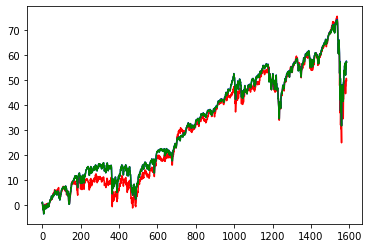

In [95]:
plt.plot(np.cumsum(mvio_return), color='red')
plt.plot(np.cumsum(mkt_return), color='blue')
plt.plot(np.cumsum(bl_return), color='green')

In [96]:
np.savetxt('new.csv', C_new, delimiter = ',')

In [97]:
result = pd.DataFrame([[0,0,0] for i in range(3)], columns = ['mean','std','SR'], index=['mkt','BL','MVIO'])

result.iloc[2,0]=mvio_return.mean()*252
result.iloc[2,1]=mvio_return.std()*np.sqrt(252)
result.iloc[2,2]=mvio_return.mean()/mvio_return.std()*np.sqrt(252)

In [98]:
result.iloc[0,0]=mkt_return.mean()*252
result.iloc[0,1]=mkt_return.std()*np.sqrt(252)
result.iloc[0,2]=mkt_return.mean()/mkt_return.std()*np.sqrt(252)

In [99]:
result.iloc[1,0]=bl_return.mean()*252
result.iloc[1,1]=bl_return.std()*np.sqrt(252)
result.iloc[1,2]=bl_return.mean()/bl_return.std()*np.sqrt(252)

In [100]:
result

,mean,std,SR
mkt,9.106663,17.742543,0.513267
BL,9.087677,17.741639,0.512223
MVIO,7.925212,19.510818,0.406196


In [48]:
def BS_C(S0,K,T,sigma,r):

    d1 = (np.log(S0 / K) + (r+sigma ** 2/2)*T) / (sigma * np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    

    
    c= S0*norm.cdf(d1)-np.exp(-r*T)*K*norm.cdf(d2)
    
    return c


def BS_P(S0,K,T,sigma,r):

    d1 = (np.log(S0 / K) + (r+sigma ** 2/2)*T) / (sigma * np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)

    p = K * np.exp(-r * T) * norm.cdf(sigma*np.sqrt(T)-d1) - S0 * norm.cdf(-d1)
   
    
    return p

def BS_C_delta(S0,K,T,sigma,r):

    d1 = (np.log(S0 / K) + (r+sigma ** 2/2)*T) / (sigma * np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    

    
    c= S0*norm.cdf(d1)-np.exp(-r*T)*K*norm.cdf(d2)
    
    return norm.cdf(d1)


def BS_P_delta(S0,K,T,sigma,r):

    d1 = (np.log(S0 / K) + (r+sigma ** 2/2)*T) / (sigma * np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)

    p = K * np.exp(-r * T) * norm.cdf(sigma*np.sqrt(T)-d1) - S0 * norm.cdf(-d1)
   
    
    return norm.cdf(d1)

In [6]:
def BSD_C(S0,K,T,sigma,r,q):

    d1 = (np.log(S0 / K) + (r-q+sigma ** 2/2)*T) / (sigma * np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    

    
    c= S0*np.exp(-q*T)*norm.cdf(d1)-np.exp(-r*T)*K*norm.cdf(d2)
    
    return c


def BSD_P(S0,K,T,sigma,r,q):

    d1 = (np.log(S0 / K) + (r-q+sigma ** 2/2)*T) / (sigma * np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)

    p = K * np.exp(-r * T) * norm.cdf(-d2) - S0 *np.exp(-q*T)* norm.cdf(-d1)
   
    
    return p


In [130]:
K=100
S=100
T=1/6
sigma=15/100
q=4/100

In [131]:
r=-1/T*np.log(0.9935)
r

0.03912730194159278

In [132]:
BSD_C(S,K,T,sigma,r,q)

2.4193594746043203

In [102]:
BS_C_delta(S,K,T,sigma,r)

0.8667671338076794

In [103]:
d1 = (np.log(S / K) + (r+sigma ** 2/2)*T) / (sigma * np.sqrt(T))
d1

1.1112384327099343

In [108]:
3.6801-0.8668*48

-37.9263

In [105]:
norm.cdf(d1)

0.8667671338076794

In [58]:
SS=40-np.exp(-2*0.03)*2

In [59]:
SS

38.116470932831504

In [62]:
(np.exp(0.03)-39/44)/(7/44)

0.9057142134221066

In [63]:
np.exp(-0.03)*6*0.906

5.27534192036969

In [64]:
(np.exp(0.03)-37/40)/(7/40)

0.6025973368772394

In [65]:
np.exp(-0.03)*5.275*0.603

3.086817414249434

In [68]:
(51+0.99+0.9775)/0.9775

54.186700767263424

In [69]:
0.99+0.9775

1.9675

In [70]:
52.9675/0.9775

54.186700767263424

In [71]:
16.33-2*10.3+6.06

1.7899999999999965

In [72]:
-np.log((54-5.5)/50)

0.030459207484708574

In [73]:
50*np.exp(-0.03)

48.52227667742541

In [74]:
50*np.exp(-0.02)

49.00993366533776

In [75]:
0.997+0.9875+101*0.9750

100.45949999999999

In [109]:
5/4*0.997+5/4*0.9875+100*0.9875

101.230625

In [110]:
100.4595-101.230625

-0.7711249999999978

In [111]:
46*6/7+1.03*(-32.45)

6.005071428571426

In [112]:
(6-46*6/7)/1.03

-32.45492371705964